In [1]:
import sys
from pathlib import Path
sys.path.insert(1, Path.cwd().parent.as_posix())

import matplotlib.pyplot as plt
import numpy as np
from utils.oscilloscope import Oscilloscope, plot_data
from rberga06.phylab import Datum as d

## Costanti dell'esperienza

In [2]:
# Costanti dell'esperienza
R = d(10.84, 0.01)  # Ω, misurata
R_INT = d(50, 1)  # Ω, nota
FEM = d(5, 0.01)  # V, nota

## Prima parte

In [3]:
files1 = list(zip(
    [1., 5., 10., 50., 100., 500., 1e3, 2.5e3, 5e3, 10e3, 20e3, 20e3, 50e3, 100e3, .1, .5, .05, .01],
    (Oscilloscope.LabDid.load_channel(1, idx, dir="data", del_data=(-1.016 if idx in (0, 14, 15, 16, 17) else None), plot_dir="elab") for idx in range(18)),
    strict=True
))

$$f(\omega) = \frac{|V|}{|\varepsilon|} = \sqrt{\frac{R^2 + \omega^2 L^2}{(R+r)^2 + \omega^2 L^2}} = \sqrt{1 - \frac{r(2R + r)}{(R+r)^2 + (\omega L)^2}}=g(\omega L)$$
$$f'(\omega) = L^2\omega\frac{(R+r)^2 - R^2}{\sqrt{(R^2+\omega^2 L^2)((R+r)^2+\omega^2 L^2)}}$$
$$f(\omega) = \frac{R}{R+r} + o(\omega^2, 0)$$
$$q=\frac{R}{R+r}\quad\implies\quad R=\frac{q}{1-q} r$$

$$g(x) = \sqrt{1 - \frac{r(2R + r)}{(R+r)^2 + x^2}}$$
$$g^{-1}(y) = \sqrt{\frac{r(2R + r)}{1 - y^2} - (R+r)^2}$$

$$\log_{10}\left(g^{-1}\left(\frac{|V|}{|\varepsilon|}\right)\right) = \log_{10}(\omega) + \log_{10}(L)$$

qV = 0.8915555555555557 ± 0.02666666666666667 V
q = 0.17831111111111114 ± 0.0056899555555555556
R = 10.850281263522286 ± 0.6383760497880342 Ω
q teorico = 0.178172255095332 ± 0.0031221889816943674
minimo = 0.1776 ± 0.0003552


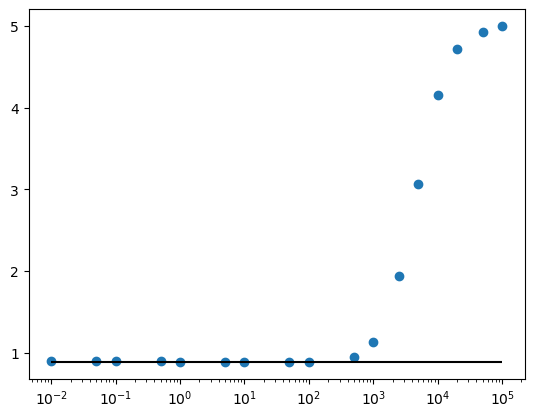

In [17]:
ampiezze = []
frequenze = []
for (f, (t, ch1)) in files1:
    frequenze.append(f)
    ampiezze.append(np.nanmax(ch1) - np.nanmin(ch1))
frequenze = frequenze[-4:] + frequenze[:-8] + frequenze[-7:-4]
ampiezze = ampiezze[-4:] + ampiezze[:-8] + ampiezze[-7:-4]
frequenze = np.array(frequenze)
ampiezze = np.array(ampiezze)

qV = d(ampiezze[:9].mean(), 0.08 / 3)
q = qV / FEM
R_stima = R_INT * q / (1-q)
print(f"qV = {qV} V")
print(f"q = {q}")
print(f"R = {R_stima} Ω")
print(f"q teorico = {R / (R + R_INT)}")
print(f"minimo = {ampiezze[:9].min() / FEM}")

plt.scatter(frequenze, ampiezze)
plt.xscale("log")
plt.hlines([qV.best], frequenze.min(), frequenze.max(), color="k")
plt.show()

Modello induttanza pura ($R=0$):
$$f(\omega) = \frac{|V|}{|\varepsilon|} = \frac{\omega L}{\sqrt{r^2 + \omega^2 L^2}}$$

m = 0.9647584217626956 ± 0.025815179362652232 = 1
q = -1.1754407704490015 ± 0.07643842169792509 = ln(L)
L = 66.76659517597395 ± 11.751319369820283 mH


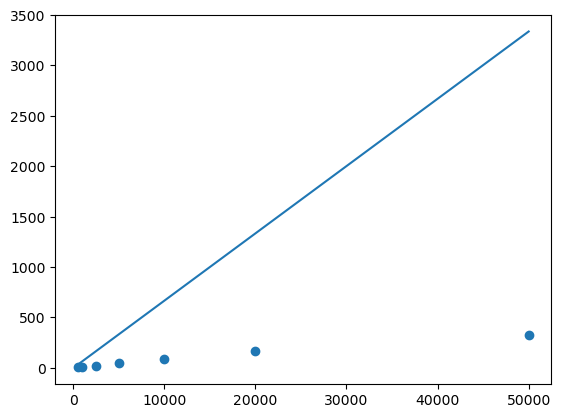

In [20]:
g_inv = np.sqrt(np.array(R_INT.best*(2*R.best + R_INT.best) / (1 - (ampiezze[9:-1] / FEM.best)**2) - (R.best+R_INT.best)**2))

[_m2, _q2], cov2 = np.polyfit(np.log10(frequenze[9:-1]) - np.log10(2 * np.pi), np.log10(g_inv), 1, cov=True)
[_dm2, _dq2] = np.sqrt(np.diag(cov2))
print(f"m = {_m2} ± {_dm2} = 1")
print(f"q = {_q2} ± {_dq2} = ln(L)")
L = d.from_delta_rel(10 ** _q2, np.log(10) * _dq2)
print(f"L = {L * 1e3} mH")  # dovrebbe venire ~1.04 mH

plt.scatter(frequenze[9:-1], g_inv)
_x = np.linspace(frequenze[9:-1].min(), frequenze[9:-1].max(), 10_000)
plt.plot(_x, L.best * _x + _q2)
# plt.xscale("log")
# plt.yscale("log")
plt.show()

$$\frac{\varepsilon_0^2}{\varepsilon_0^2-V_0^2} = \frac{L^2}{(R+r)^2-R^2}\omega^2+\frac{(R+r)^2}{(R+r)^2 - R^2}$$
$$\frac{\varepsilon_0^2}{\varepsilon_0^2-V_0^2} = \frac{4\pi^2L^2}{(R+r)^2-R^2}\nu^2+\frac{(R+r)^2}{(R+r)^2 - R^2}$$

## Seconda parte

In [13]:
files2 = list(zip(
    [1., 10., 50., 100., 500., 1e3, 2.5e3, 5e3, 10e3, 12.5e3, 25e3, 50e3, 100e3],
    (Oscilloscope.LabDid.load_data(idx, dir="data", plot_dir="elab", ch1_del_data=(-1.016 if idx == 29 else None), ch2_del_data=(-0.256 if idx == 29 else None)) for idx in range(29, 42)),
    strict=True
))

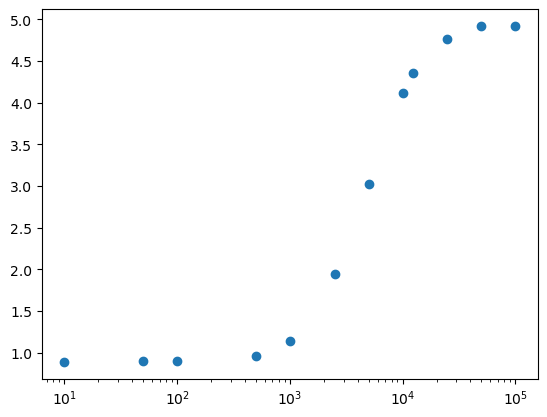

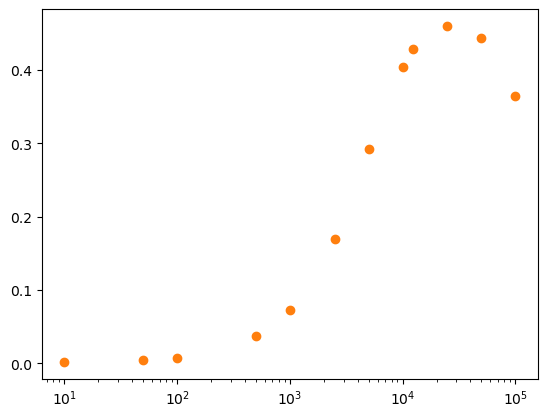

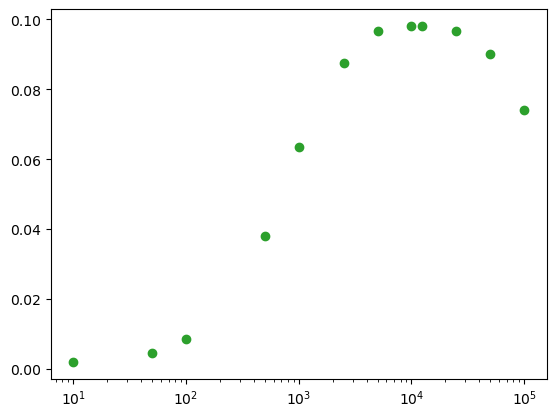

In [15]:
ampiezze1 = []
ampiezze2 = []
frequenze = []
for (f, (t, ch1, ch2)) in files2[1:]:
    frequenze.append(f)
    ampiezze1.append(np.nanmax(ch1) - np.nanmin(ch1))
    ampiezze2.append(np.nanmax(ch2) - np.nanmin(ch2))
frequenze = np.array(frequenze)
ampiezze1 = np.array(ampiezze1)
ampiezze2 = np.array(ampiezze2)

plt.scatter(frequenze, ampiezze1, color="C0")
plt.xscale("log")
plt.show()
plt.scatter(frequenze, ampiezze2, color="C1")
plt.xscale("log")
plt.show()
plt.scatter(frequenze, ampiezze2 / ampiezze1, color="C2")
plt.xscale("log")
plt.show()